In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data2012 = pd.read_csv("finalized/2012-scores.csv")
data2014 = pd.read_csv("finalized/2014-scores.csv")
data2016 = pd.read_csv("finalized/2016-scores.csv")
data2018 = pd.read_csv("finalized/2018-scores.csv")

df2018 = data2018[data2018.columns.difference(['census_tract', 'full_name', 'score'])]
df2016 = data2016[data2016.columns.difference(['census_tract', 'full_name', 'score'])]
df2014 = data2014[data2014.columns.difference(['census_tract', 'full_name', 'score'])]
df2012 = data2012[data2012.columns.difference(['census_tract', 'full_name', 'score'])]

In [3]:
df2018 = df2018.rename(columns={"associates": "associates2018", "bachelors": "bachelors2018","car": "car2018","diff_countyHouse": "diff_countyHouse2018","diff_countyRent": "diff_countyRent2018","diff_stateHouse": "diff_stateHouse2018","diff_stateRent": "diff_stateRent2018","health_ins": "health_ins2018","house_val": "house_val2018","museums": "museums2018","pharmacies": "pharmacies2018","population": "population2018","poverty": "poverty2018","self_income": "self_income2018"})

In [4]:
rename = lambda year, dataframe: dict(zip(list(dataframe.columns), [s + str(year) for s in list(dataframe.columns)]))

In [5]:
df2016 = df2016.rename(columns=rename(2016, df2016))
df2014 = df2014.rename(columns=rename(2014, df2014))
df2012 = df2012.rename(columns=rename(2012, df2012))

In [6]:
max_min = lambda df: [(column, min(df[column]), max(df[column])) for column in df.columns]
print(max_min(df2012))
print(max_min(df2014))
print(max_min(df2016))
print(max_min(df2018))

[('associates2012', -1.6463234192602414, 5.427591491401371), ('bachelors2012', -1.4594193394045774, 5.288383709753306), ('car2012', -2.4369615572323617, 6.475261692612801), ('diff_countyHouse2012', -0.6876217703363279, 8.280629956701395), ('diff_countyRent2012', -0.634448158892937, 11.505239879652047), ('diff_stateHouse2012', -0.6497774080768679, 8.51419143199533), ('diff_stateRent2012', -0.5885352457634591, 13.156391052579856), ('health_ins2012', -2.4059515729937866, 6.45657252160559), ('house_val2012', -2.1439457657691765, 4.073696758254935), ('museums2012', -2.1707867632669537, 2.2129110749962333), ('pharmacies2012', -1.1978925901857995, 3.2454497445253403), ('population2012', -2.4369615572323617, 6.475261692612801), ('poverty2012', -0.9431516755090966, 7.170962847851043), ('self_income2012', -1.4622810534346715, 5.689555988229443)]
[('associates2014', -1.6316801508260674, 5.22360781368802), ('bachelors2014', -1.455812596037446, 4.684716395407109), ('car2014', -2.4043340408846543, 6

In [7]:
df2016.head()

,associates2016,bachelors2016,car2016,diff_countyHouse2016,diff_countyRent2016,diff_stateHouse2016,diff_stateRent2016,health_ins2016,house_val2016,museums2016,pharmacies2016,population2016,poverty2016,self_income2016
0,-1.124448,-1.184470,-1.138599,-0.619780,-0.564730,-0.558350,0.067856,-1.112696,-0.763971,0.312683,-0.308789,-1.138599,0.844990,-0.941716
1,0.070396,-0.318310,1.072695,1.396378,-0.718012,-0.691798,-0.408449,1.101662,-0.529140,-0.125641,1.764868,1.072695,1.804083,-0.486864
2,1.393259,0.447909,1.146762,0.013870,0.753498,-0.398213,1.169311,1.175742,-0.182118,-0.710074,0.579921,1.146762,0.481123,0.278114
3,-1.312210,-0.942945,-0.654476,-0.696586,-0.334806,-0.691798,-0.155412,-0.625806,-1.297428,1.335440,-0.308789,-0.654476,0.680934,-1.262179
4,2.016284,1.118351,1.993709,-0.696586,5.275326,-0.344834,0.425084,2.022835,-0.024831,-0.417858,0.283684,1.993709,0.622042,0.495202


In [8]:
df2014 = df2014.drop([2006, 2007])

In [9]:
df2012 = df2012.drop([2006])

In [10]:
print(df2012.columns)
print(df2012.shape)

Index(['associates2012', 'bachelors2012', 'car2012', 'diff_countyHouse2012',
       'diff_countyRent2012', 'diff_stateHouse2012', 'diff_stateRent2012',
       'health_ins2012', 'house_val2012', 'museums2012', 'pharmacies2012',
       'population2012', 'poverty2012', 'self_income2012'],
      dtype='object')
(2006, 14)


In [11]:
final = np.concatenate([df2016.to_numpy(), df2018.to_numpy()], axis = 1)

X_train = np.concatenate([df2012.to_numpy(), df2014.to_numpy()], axis = 1)
X_test = np.concatenate([df2014.to_numpy(), df2016.to_numpy()], axis = 1)
y_train = data2016['score']
y_test = data2018['score']

In [12]:
y_scale = y_train.std()
y_center = y_train.mean()

y_train =(y_train-y_train.mean())/y_train.std()
y_test =(y_test-y_test.mean())/y_test.std()



In [13]:
data_dmatrix = xgb.DMatrix(data=final,label=y_test) #wrong

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(final, y, test_size=0.1, random_state=170)

#don't use split, just assign them
#X_train = 2012 and 2014 data
#X_test = 2014 and 2016 data
#y_train = 2016 scores
#y_test = 2018 scores

In [15]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [16]:
colnames = lambda df1, df2: dict(zip(range(10000), list(df1.columns) + list(df2.columns)))
weights = [1]*len(colnames(df2014, df2016))
#weights[2] = 1.5
weights = np.array(weights)/sum(weights)
print(weights)

[0.03571429 0.03571429 0.03571429 0.03571429 0.03571429 0.03571429
 0.03571429 0.03571429 0.03571429 0.03571429 0.03571429 0.03571429
 0.03571429 0.03571429 0.03571429 0.03571429 0.03571429 0.03571429
 0.03571429 0.03571429 0.03571429 0.03571429 0.03571429 0.03571429
 0.03571429 0.03571429 0.03571429 0.03571429]


In [17]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test) #this is currently outputting 2018 so if i want to predict 2020, then use 2016 and 2018 data

[17:06:26] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:26] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
preds = preds*y_scale+y_center
print(min(preds))
print(np.mean(preds))
print(max(preds))
print(y_scale)
print(y_center)

20.366543
30.339039
48.495407
11.35740913913545
28.349413139288565


In [19]:
import inspect
inspect.getargspec(xg_reg.fit).args

/Users/rachellecha/Desktop/UBS/UBS/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  


['self',
 'X',
 'y',
 'sample_weight',
 'base_margin',
 'eval_set',
 'eval_metric',
 'early_stopping_rounds',
 'verbose',
 'xgb_model',
 'sample_weight_eval_set',
 'callbacks']

In [20]:
xgb.__version__

'1.2.1'

In [21]:
print(max(preds)) #?

48.495407


In [22]:
pd.DataFrame(preds).to_csv("2020scores.csv", header = None, index = False)

In [23]:
rmse = np.sqrt(mean_squared_error(y_test, preds)) #this should be 2018
print("RMSE: %f" % (rmse))

RMSE: 30.835861


In [24]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", seed=170)

[17:06:26] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:26] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:26] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
print(cv_results)
#show RMSE for within the years and the future

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          1.050407        0.008853        1.053943       0.017149
1          0.959593        0.008262        0.963590       0.018024
2          0.878328        0.007222        0.883773       0.018916
3          0.805153        0.006995        0.811207       0.018326
4          0.740117        0.007156        0.747279       0.018455
..              ...             ...             ...            ...
95         0.156960        0.004177        0.186121       0.037676
96         0.156820        0.004183        0.186020       0.037673
97         0.156648        0.004166        0.185841       0.037745
98         0.156481        0.004133        0.185691       0.037782
99         0.156303        0.004121        0.185522       0.037797

[100 rows x 4 columns]


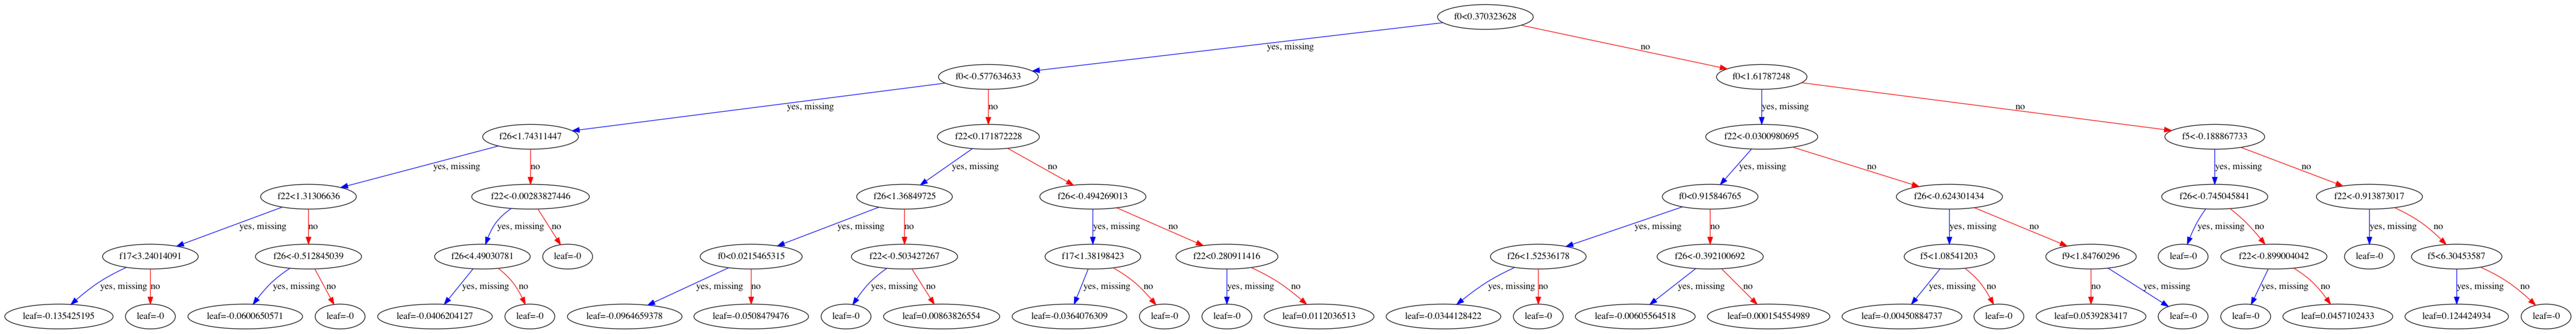

In [26]:
import matplotlib.pyplot as plt
import graphviz

#xgb.plot_tree(xg_reg,num_trees=0)
#plt.rcParams['figure.figsize'] = [10000, 10000]
#plt.show()

xgb.plot_tree(xg_reg)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.savefig('xgb_tree.png')

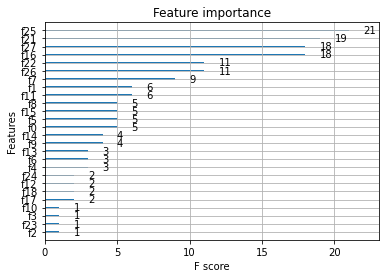

In [27]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.savefig('features.png')

In [28]:
colnames = lambda df1, df2: dict(zip(range(10000), list(df1.columns) + list(df2.columns)))
print(colnames(df2014, df2016))

{0: 'associates2014', 1: 'bachelors2014', 2: 'car2014', 3: 'diff_countyHouse2014', 4: 'diff_countyRent2014', 5: 'diff_stateHouse2014', 6: 'diff_stateRent2014', 7: 'health_ins2014', 8: 'house_val2014', 9: 'museums2014', 10: 'pharmacies2014', 11: 'population2014', 12: 'poverty2014', 13: 'self_income2014', 14: 'associates2016', 15: 'bachelors2016', 16: 'car2016', 17: 'diff_countyHouse2016', 18: 'diff_countyRent2016', 19: 'diff_stateHouse2016', 20: 'diff_stateRent2016', 21: 'health_ins2016', 22: 'house_val2016', 23: 'museums2016', 24: 'pharmacies2016', 25: 'population2016', 26: 'poverty2016', 27: 'self_income2016'}
